In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.set_option("max_columns", 1000)

/kaggle/input/lish-moa/sample_submission.csv
/kaggle/input/lish-moa/train_targets_scored.csv
/kaggle/input/lish-moa/train_targets_nonscored.csv
/kaggle/input/lish-moa/train_features.csv
/kaggle/input/lish-moa/test_features.csv


In [2]:
DIR = "/kaggle/input/lish-moa/"
train_feat = pd.read_csv(DIR+"train_features.csv")
test_feat = pd.read_csv(DIR+"test_features.csv")
train_nonscore = pd.read_csv(DIR+"train_targets_nonscored.csv")
train_score = pd.read_csv(DIR+"train_targets_scored.csv")

# training data

## overview

In [3]:
train_feat.shape

(23814, 876)

In [4]:
train_feat.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12  \
0 -0.1944 -1.0120 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574   
1  1.0190  0.5207  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958   
2 -0.0323  1.2390  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366   
3  4.0620 -0.8095 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511   
4  1.4180 -0.8244 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577   

     g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21  \
0 -0.4015  0.1789 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360   
1  0.4590  0.0803  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646   
2 -1.8300  0.6057 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181   
3 -0.5844 -2.5690  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580   
4  1.1750  0.2042  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685   

     g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30  \
0 -1.1880  0.6940  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934   
1 -0.2657 -0.3372  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499   
2 -1.5320  0.2307  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530   
3 -0.7191 -0.8004 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575   
4  0.7649  0.2057  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712   

     g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39  \
0 -0.5584 -0.0916 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162   
1 -0.2627  0.9959 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455   
2  0.6069  0.4290  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310   
3  0.0881 -2.7370  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814   
4  0.6389  0.6674 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848   

     g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48  \
0 -0.0347 -0.2566 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350   
1  0.1194 -0.3958 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710   
2  0.3477 -0.5561  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983   
3 -0.7229 -0.0010  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851   
4  0.1302  0.1224  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780   

     g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57  \
0  0.4233 -0.1221 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263   
1 -0.8900  1.2730 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759   
2  0.4552 -0.0978 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621   
3  0.6636 -2.8230 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331   
4 -0.8147 -0.0803 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130   

     g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66  \
0  0.5790  0.9588  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670   
1  0.3249 -0.7408 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026   
2 -0.1757 -1.4370  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292   
3  0.0899 -1.5240  0.3936  1.4630 -1.2100 -1.2340 -1.0300  0.7977  0.2314   
4  0.7709  0.6745  0.7871  1.6410  0.1806  1.3480  1.1070  0.5392  0.0000   

     g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75  \
0 -0.4195  0.6551 -0.7395 -0.7047 -0.5369  0.0314 -0.5239 -0.3406 -0.6332   
1  0.0954 -0.4054  0.1197  0.1956  0.0720 -0.2463 -0.1084  0.4008 -0.5857   
2  0.0939  0.5916  0.6809  0.7821  0.6801  0.9634  0.4057 -0.0708 -1.3570   
3  

In [5]:
train_score.shape

(23814, 207)

In [6]:
train_score.head()

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  adrenergic_receptor_agonist  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   adrenergic_receptor_antagonist  akt_inhibitor  \
0                               0              0   
1                               0              0   
2                               0              0   
3                               0              0   
4                               0              0   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                                 0              0               0          0   
1                                 0              0               0          0   
2                                 0              0               0          0   
3                                 0              0               0          0   
4                                 0              0               0          0   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                                0                  0               0   
1                                0                  0               0   
2                                0                  0               0   
3                                0                  0               0   
4                                0                  0               0   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0           0               0           0              0             0   
1          

In [7]:
set(train_feat.sig_id.unique()) == set(train_score.sig_id.unique())

True

# cp variables

In [8]:
cp_feats = [i for i in train_feat.columns if "cp_" in i]
print(cp_feats)
# cp_type: indicates samples treated with a compound (cp_vehicle) or with a control perturbation (ctrl_vehicle); control perturbations have no MoAs
print(train_feat["cp_type"].value_counts())

['cp_type', 'cp_time', 'cp_dose']
trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64


[24 72 48]


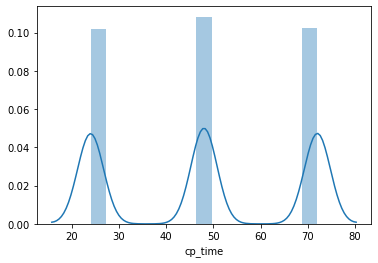

In [9]:
# cp_time: treatment duration
print(train_feat["cp_time"].unique())
sns.distplot(train_feat["cp_time"])

In [10]:
# cp_dose: dose (high or low)
print(train_feat["cp_dose"].value_counts())

D1    12147
D2    11667
Name: cp_dose, dtype: int64


# g variables

In [11]:
# clear colleration in g variables
g_feats = [i for i in train_feat.columns if "g-" in i]
correlations = train_feat[g_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(20)

level_0 level_1         0
595192   g-369   g-410  0.825646
595193   g-410   g-369  0.825646
595194   g-121   g-672  0.830927
595195   g-672   g-121  0.830927
595196   g-195    g-63  0.832779
595197    g-63   g-195  0.832779
595198   g-123   g-744  0.833150
595199   g-744   g-123  0.833150
595200   g-369   g-569  0.834865
595201   g-569   g-369  0.834865
595202   g-460   g-349  0.836859
595203   g-349   g-460  0.836859
595204   g-489    g-50  0.840404
595205    g-50   g-489  0.840404
595206    g-37   g-489  0.842525
595207   g-489    g-37  0.842525
595208    g-50   g-672  0.845668
595209   g-672    g-50  0.845668
595210    g-37    g-50  0.907061
595211    g-50    g-37  0.907061

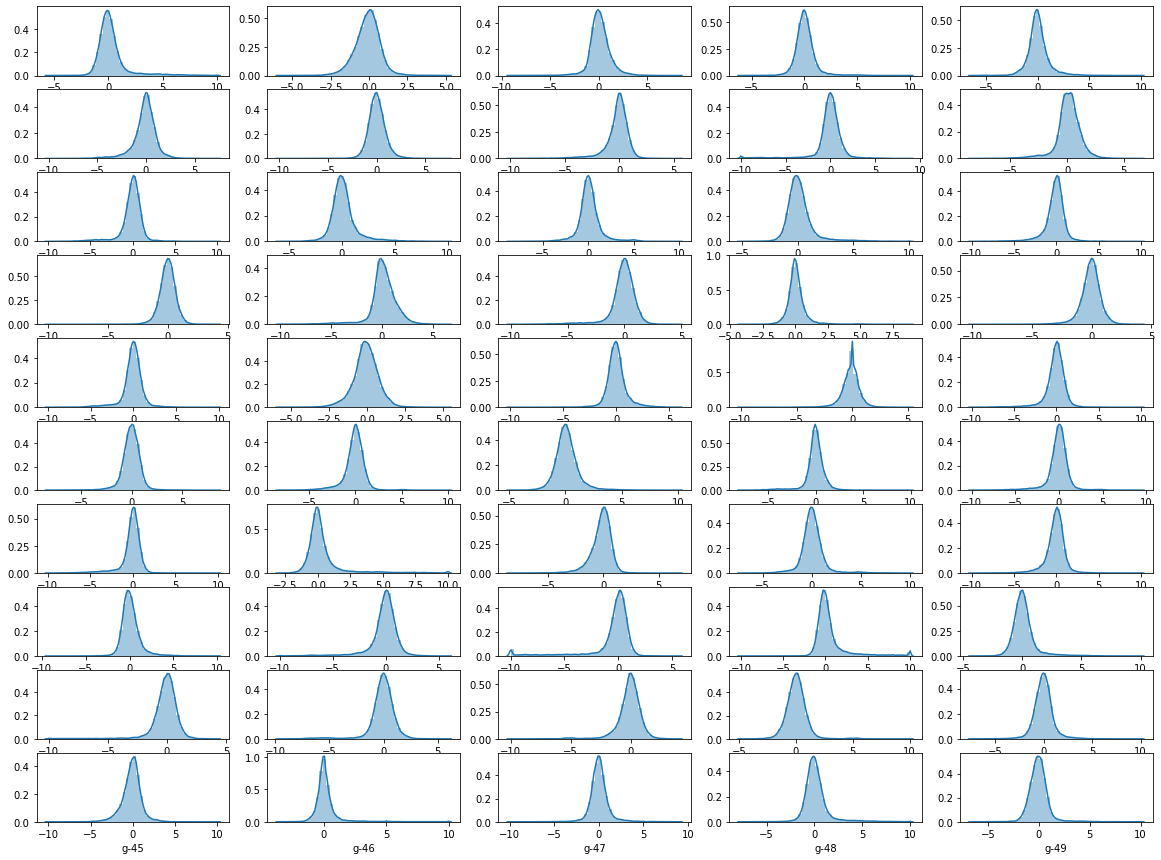

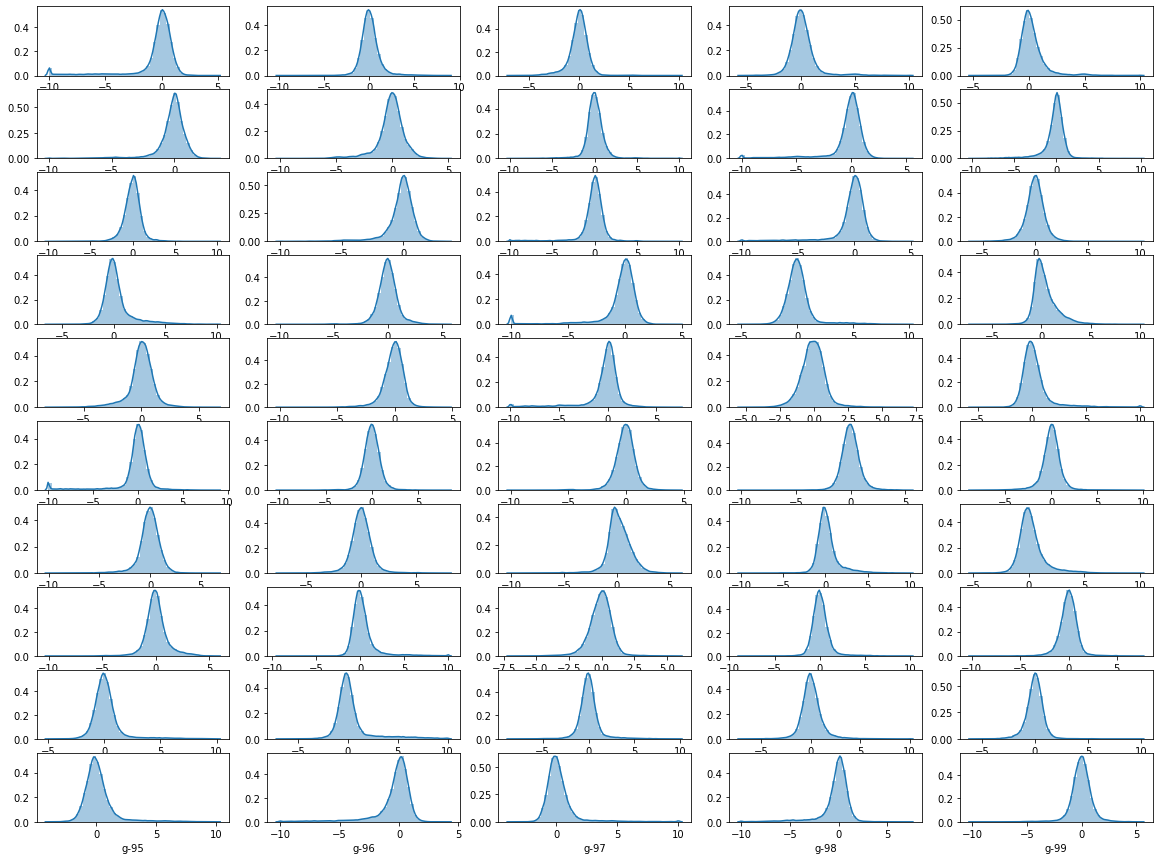

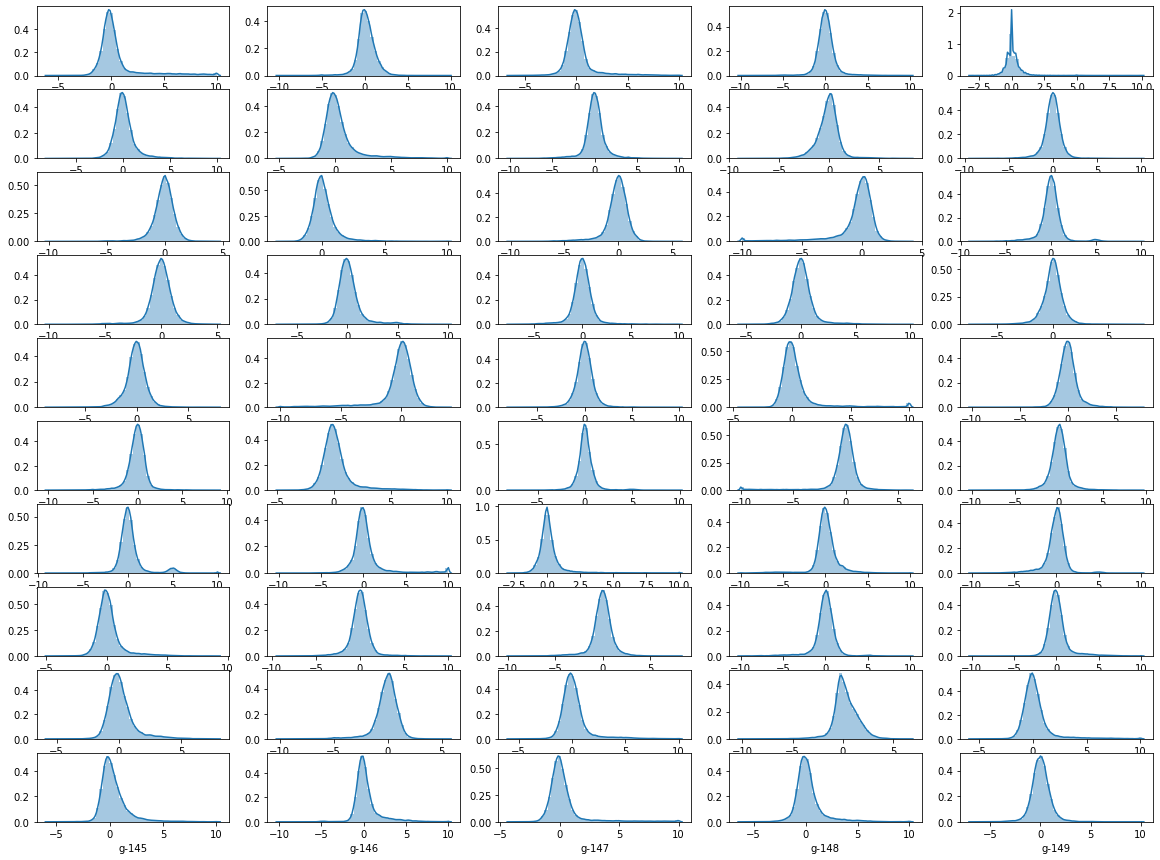

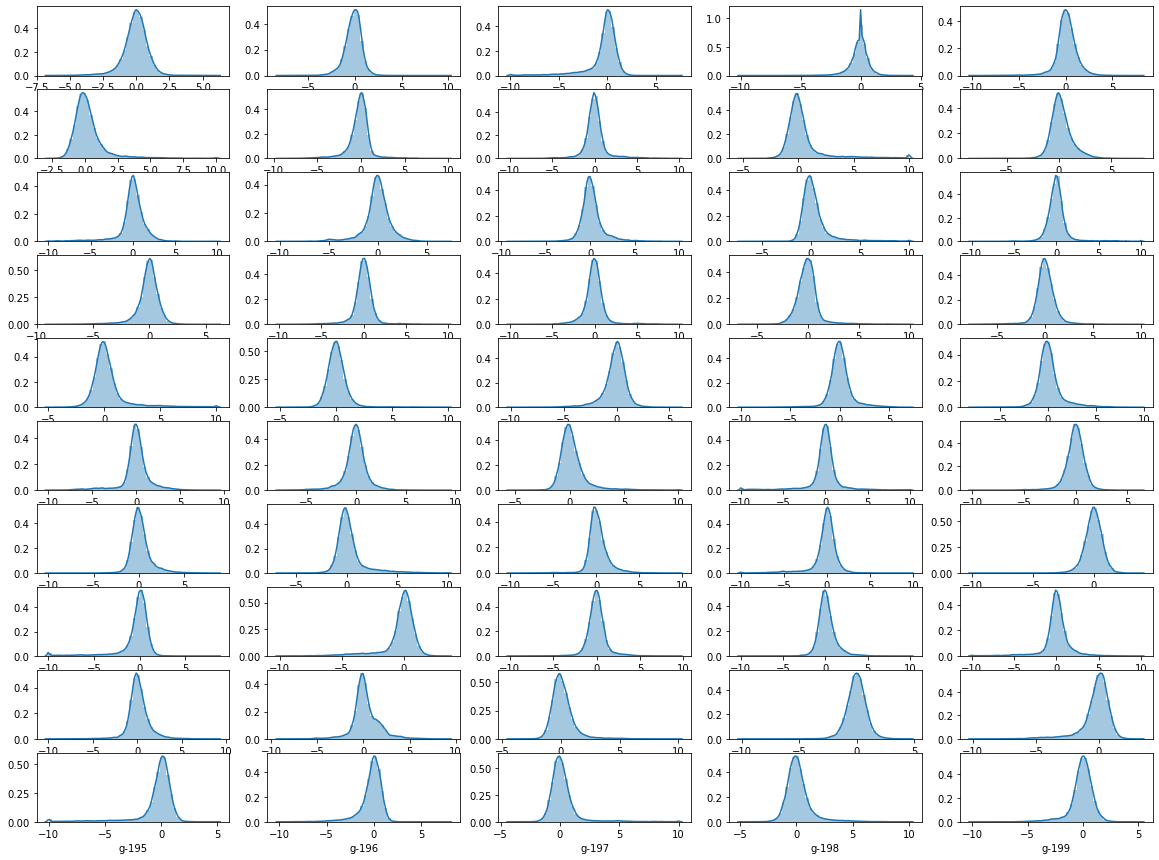

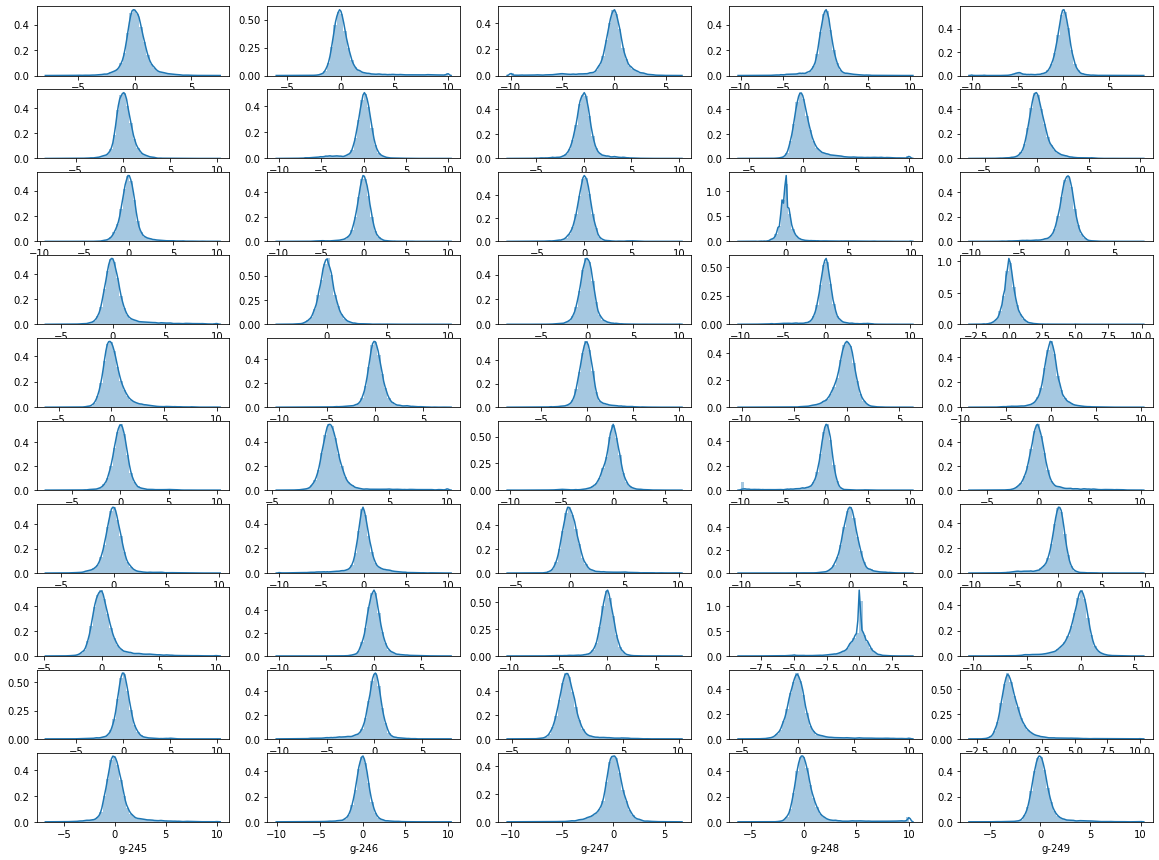

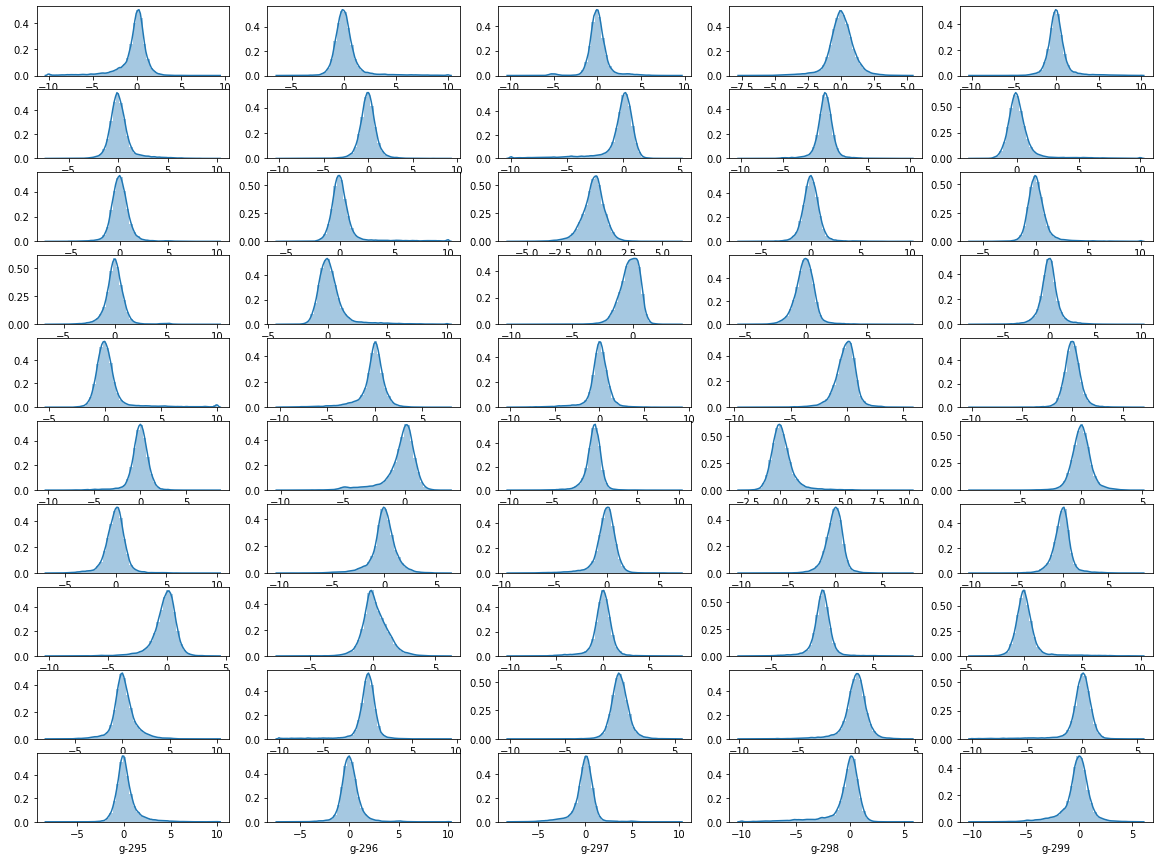

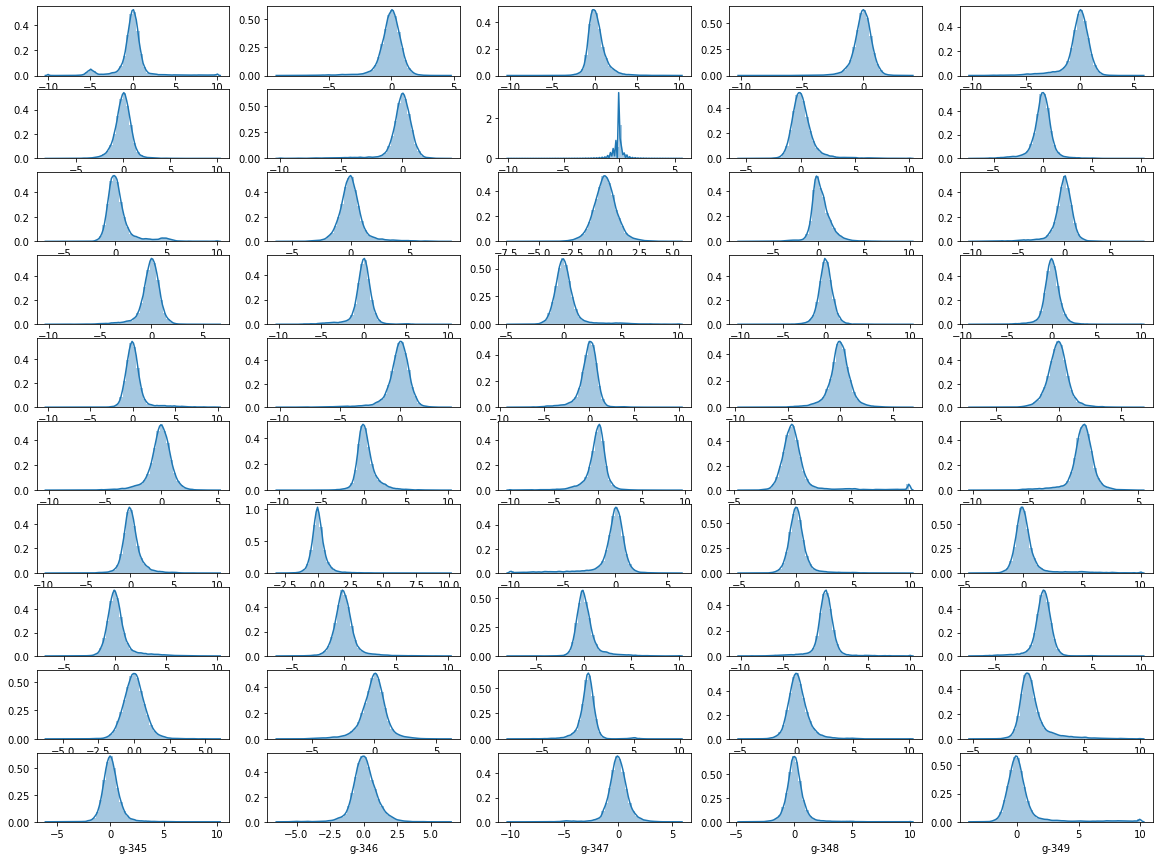

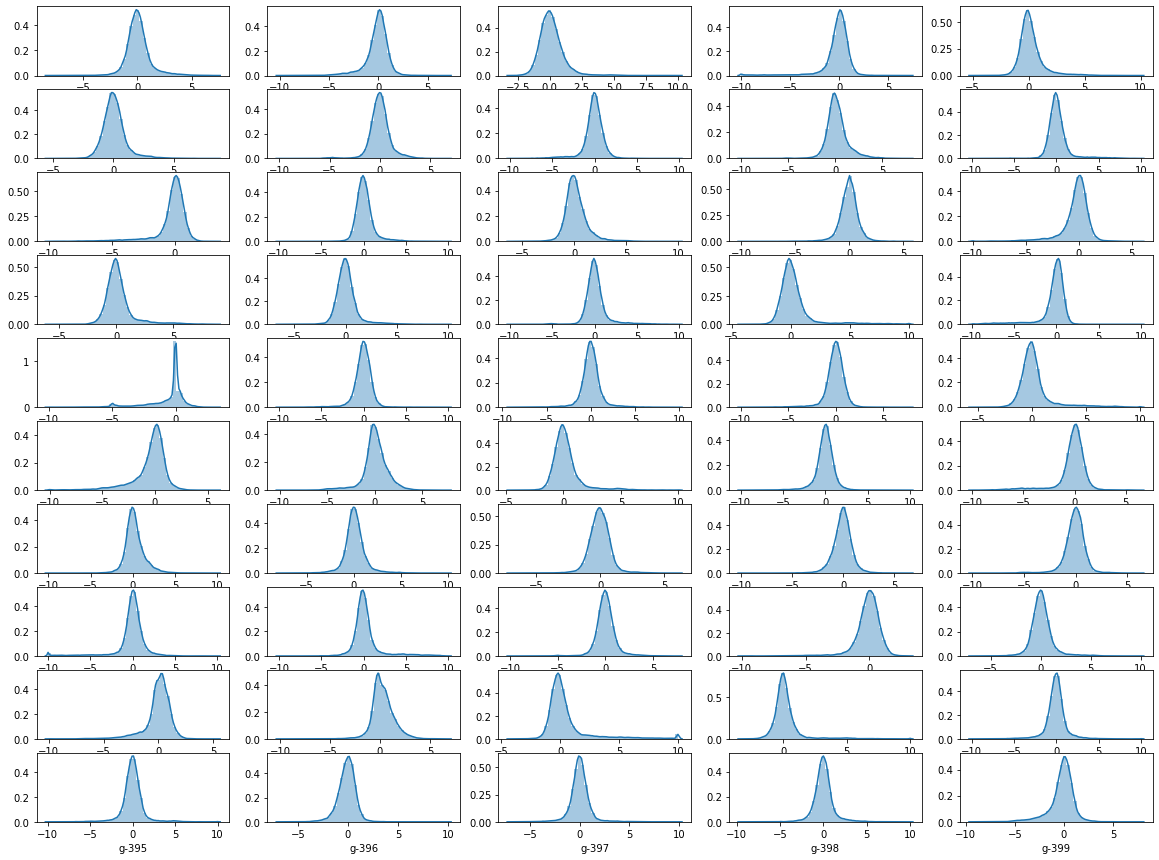

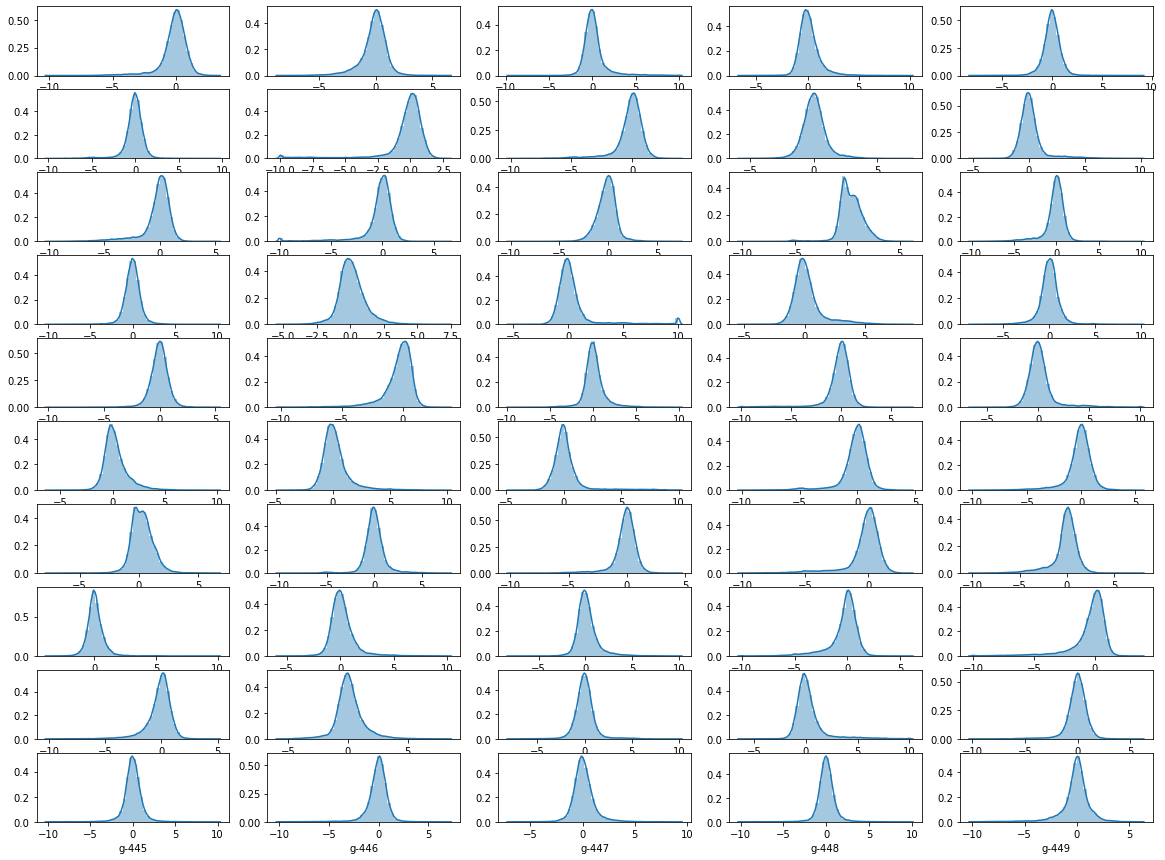

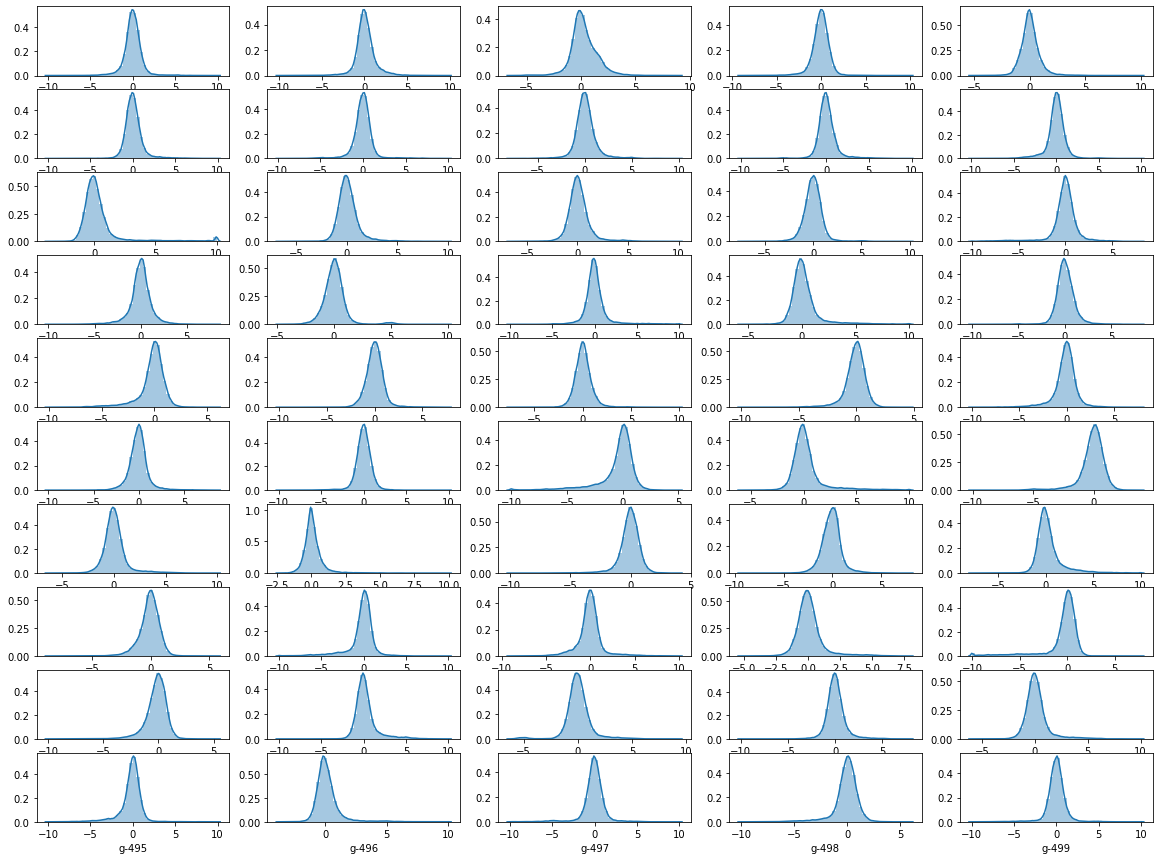

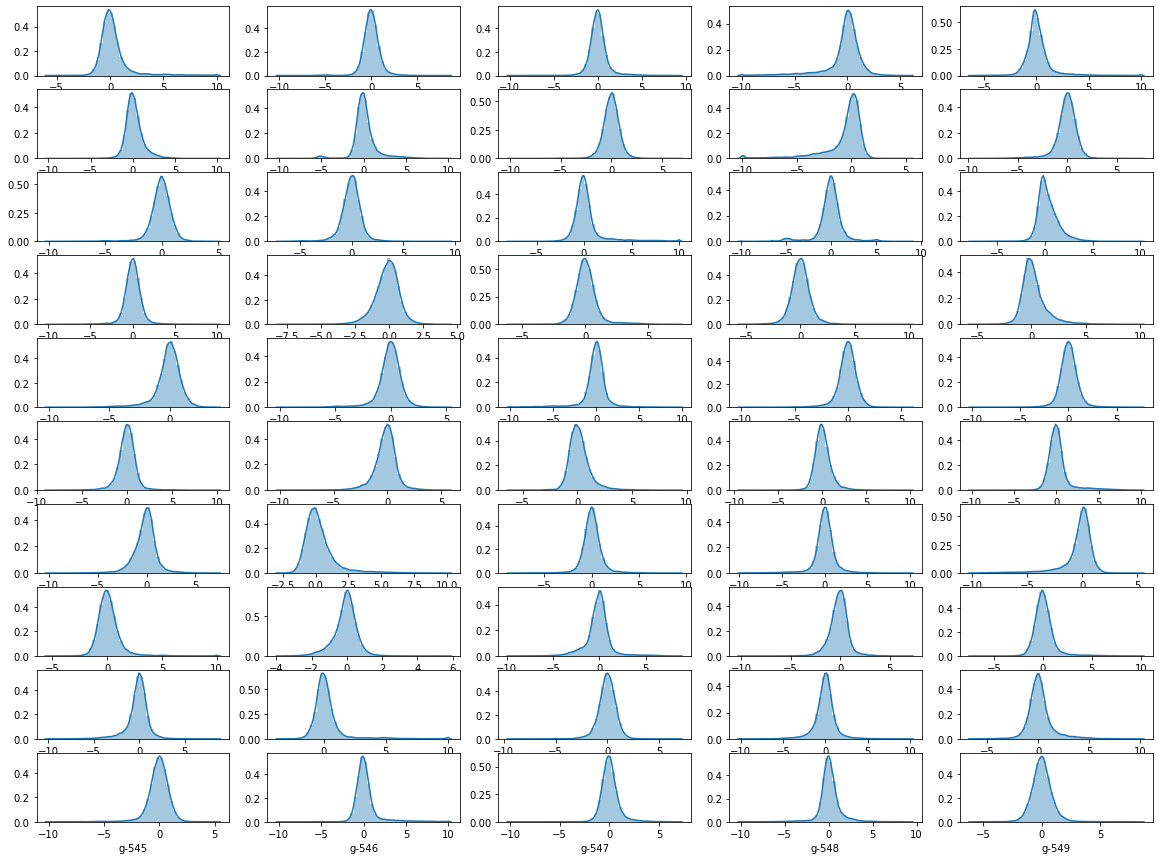

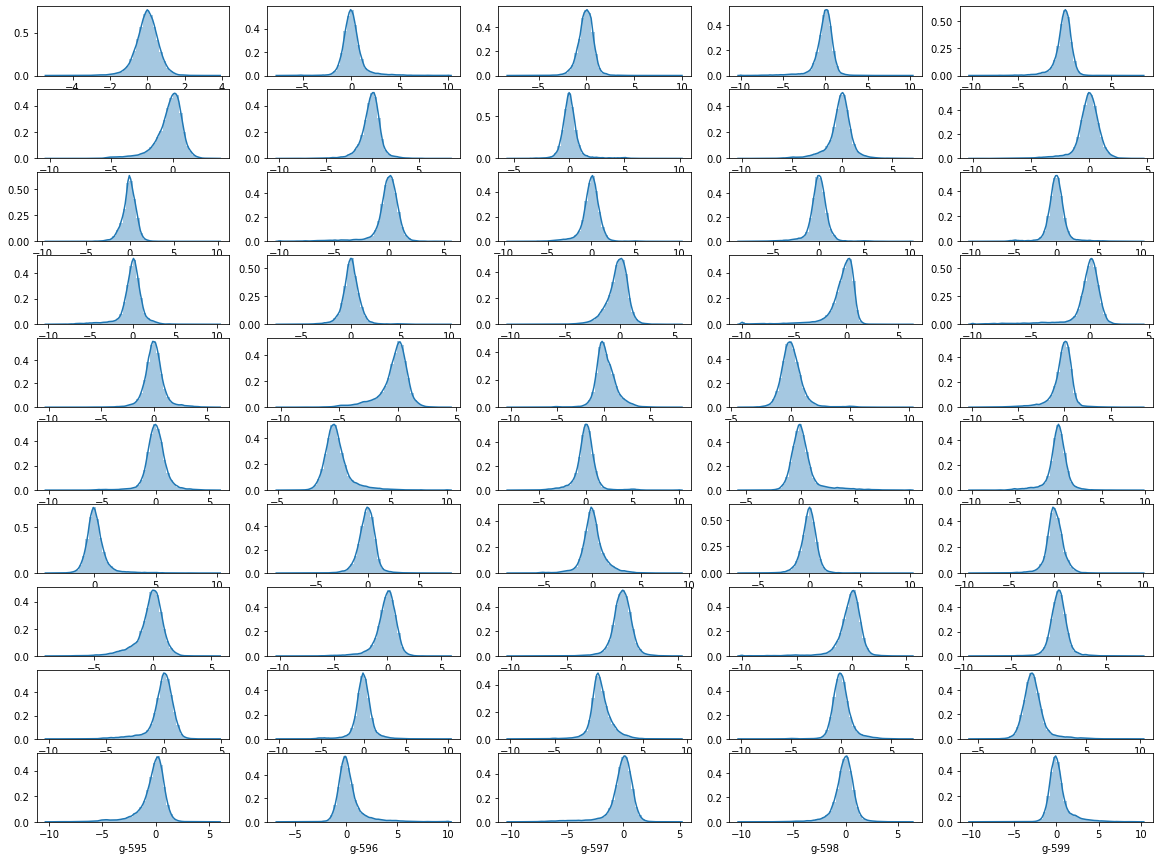

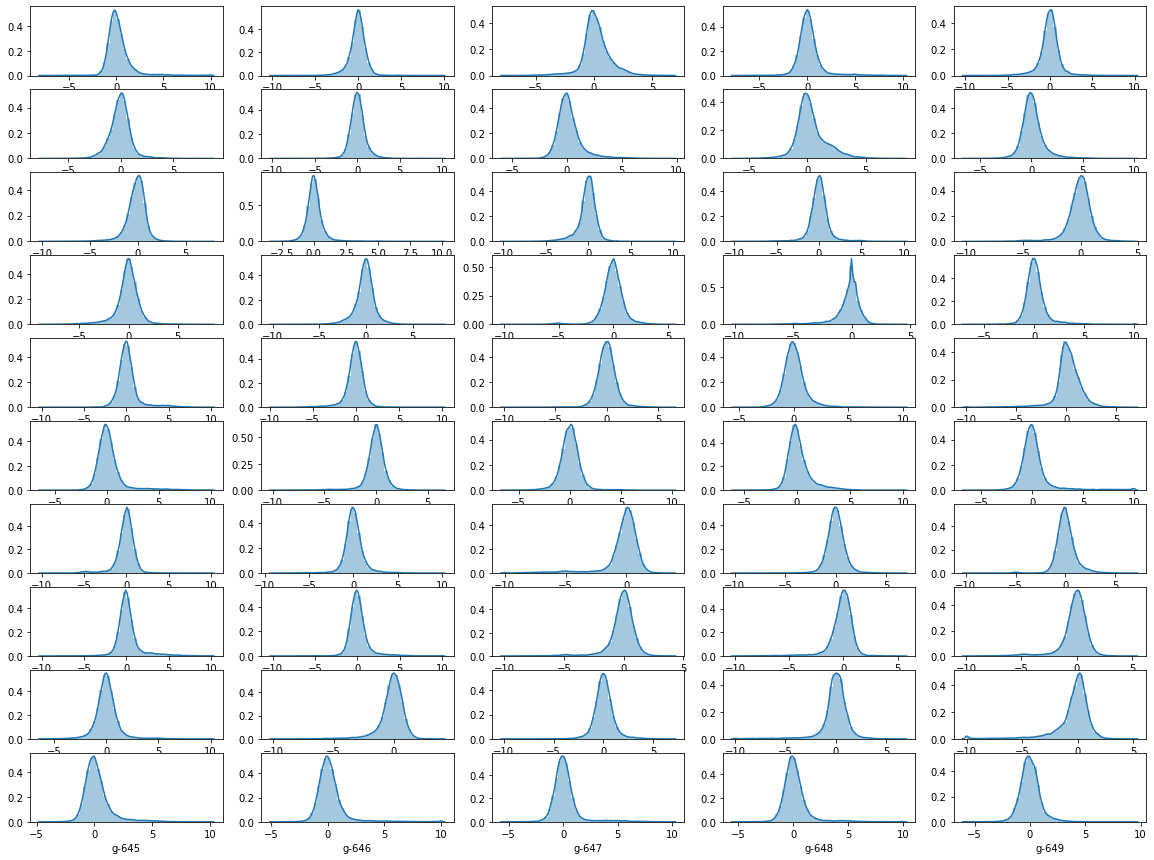

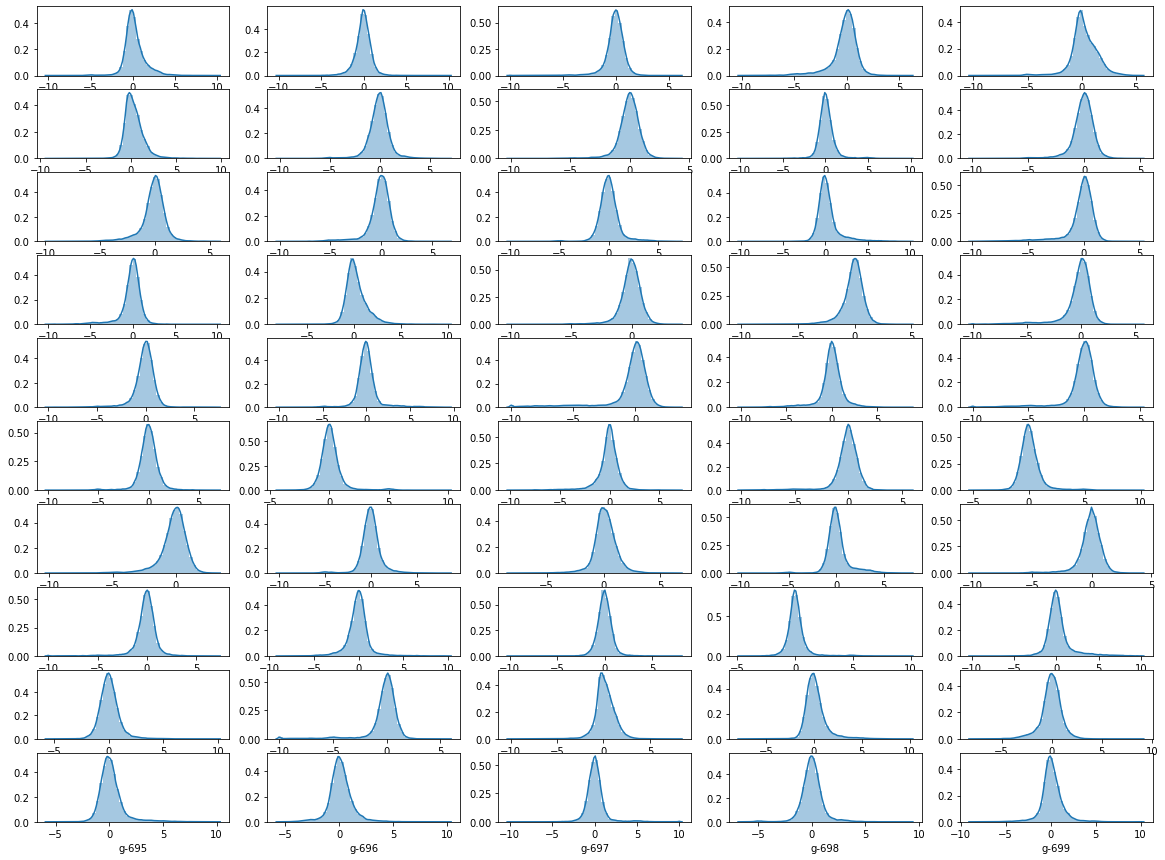

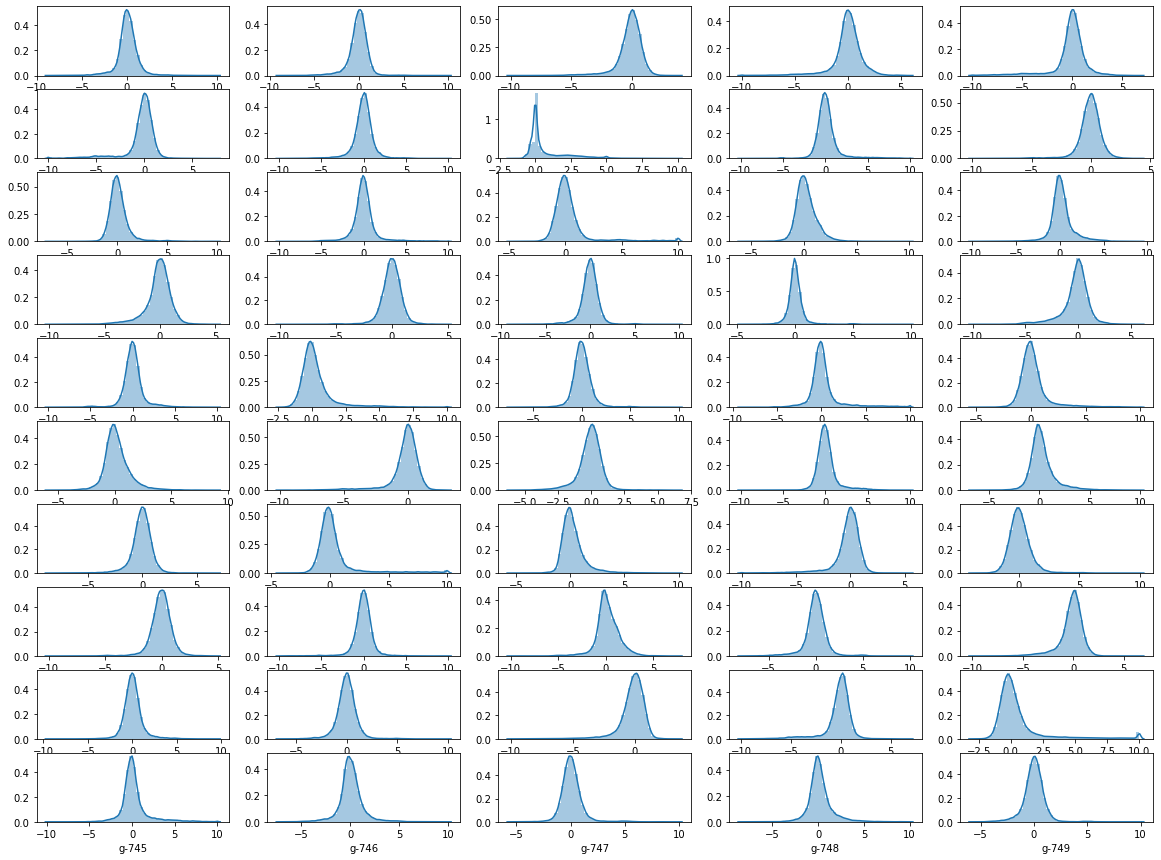

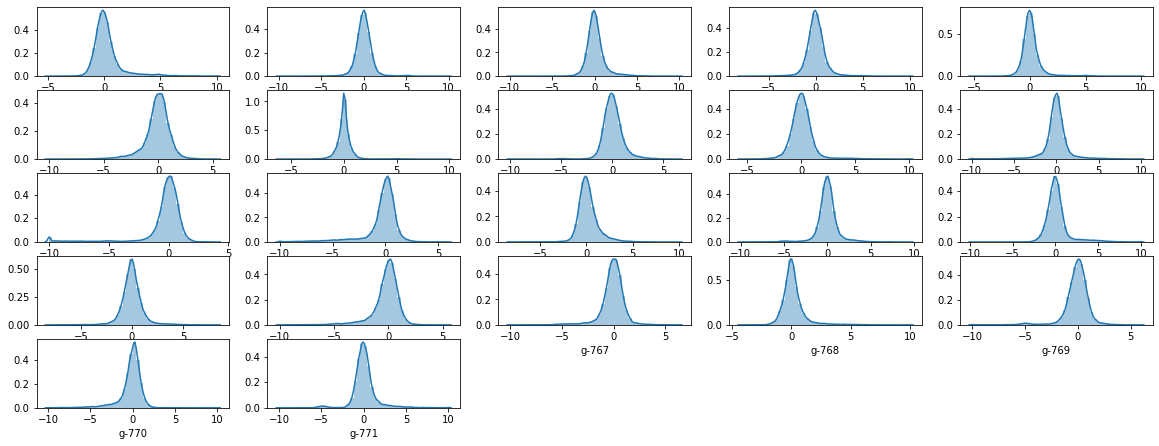

In [12]:
for k in range(len(g_feats)//50 + 1):
    plt.figure(figsize=(20,15))
    for i in range(50*k, 50*(k+1)):
        if i <= len(g_feats)-1:
            plt.subplot(10,5,i+1-50*k)
            sns.distplot(train_feat["g-"+str(i)])

# c variables

In [13]:
# clear correlations in c variables
c_feats = [i for i in train_feat.columns if "c-" in i]
correlations = train_feat[c_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(20)

level_0 level_1         0
9880     c-4    c-42  0.913242
9881    c-42     c-4  0.913242
9882    c-52     c-4  0.913649
9883     c-4    c-52  0.913649
9884    c-94    c-13  0.914001
9885    c-13    c-94  0.914001
9886    c-38    c-94  0.914368
9887    c-94    c-38  0.914368
9888    c-38    c-63  0.914578
9889    c-63    c-38  0.914578
9890    c-11    c-55  0.914637
9891    c-55    c-11  0.914637
9892     c-6    c-33  0.914730
9893    c-33     c-6  0.914730
9894    c-13    c-26  0.921875
9895    c-26    c-13  0.921875
9896    c-73    c-13  0.923344
9897    c-13    c-73  0.923344
9898    c-52    c-42  0.924619
9899    c-42    c-52  0.924619

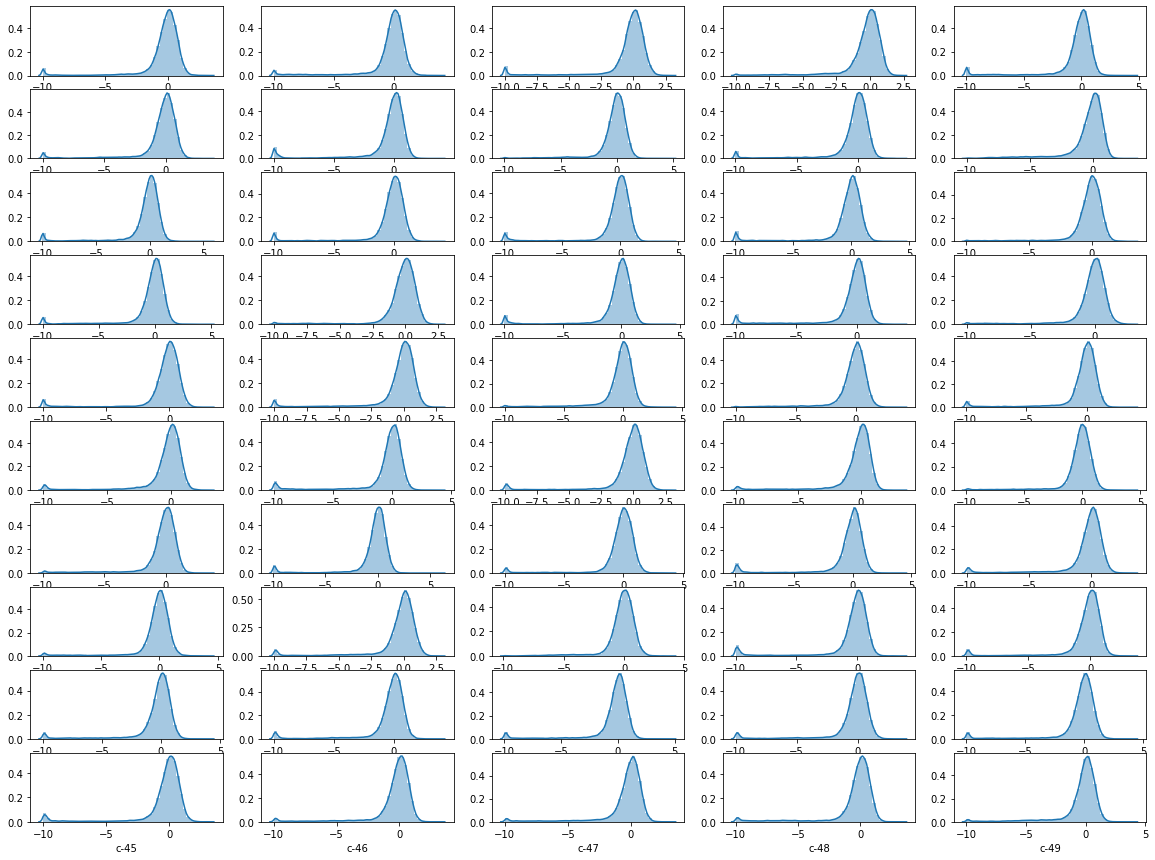

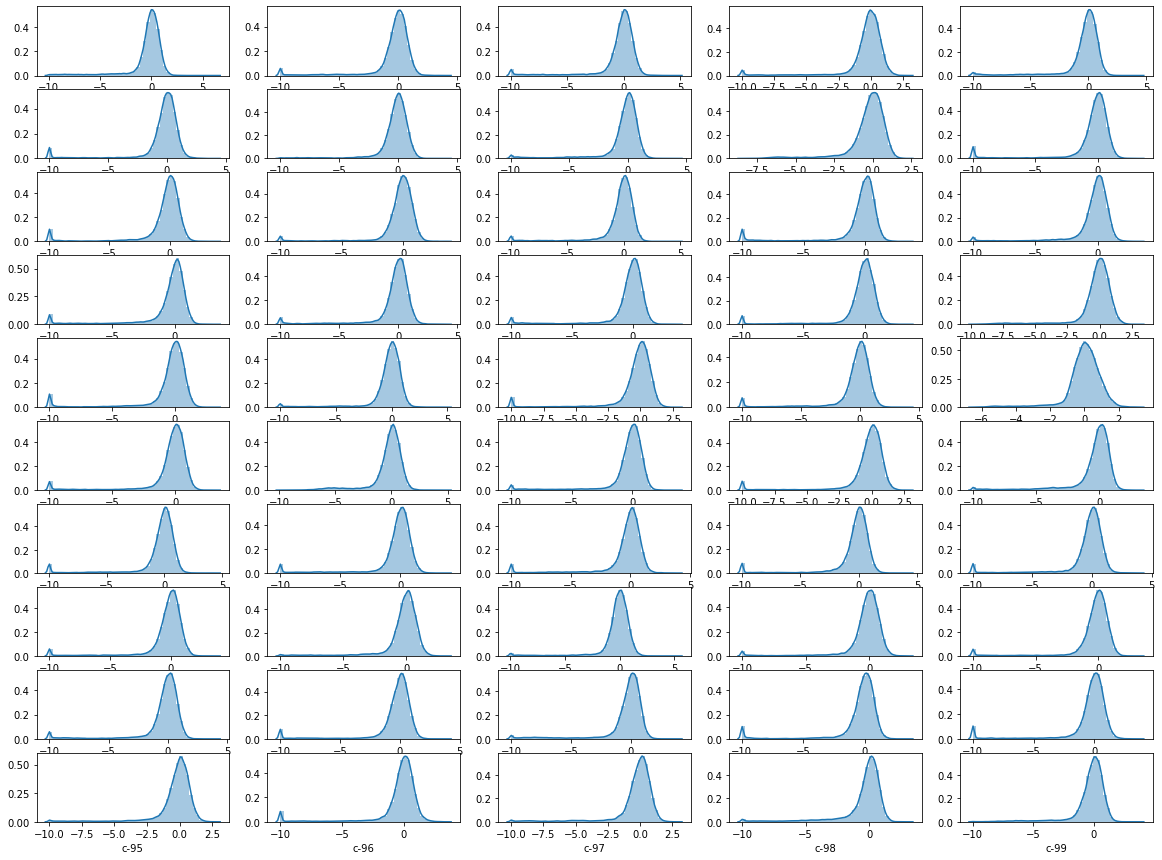

<Figure size 1440x1080 with 0 Axes>

In [14]:
for k in range(len(c_feats)//50 + 1):
    plt.figure(figsize=(20,15))
    for i in range(50*k, 50*(k+1)):
        if i <= len(c_feats)-1:
            plt.subplot(10,5,i+1-50*k)
            sns.distplot(train_feat["c-"+str(i)])

# target info

## per target

In [15]:
target_feats = [i for i in train_score.columns if i != "sig_id"]
target_dists = pd.DataFrame(np.sum(train_score[target_feats])).reset_index(drop=False)
target_dists.columns = ["target", "number"]
target_dists

target  number
0              5-alpha_reductase_inhibitor      17
1                   11-beta-hsd1_inhibitor      18
2                           acat_inhibitor      24
3           acetylcholine_receptor_agonist     190
4        acetylcholine_receptor_antagonist     301
..                                     ...     ...
201  ubiquitin_specific_protease_inhibitor       6
202                        vegfr_inhibitor     170
203                              vitamin_b      26
204             vitamin_d_receptor_agonist      39
205                          wnt_inhibitor      30

[206 rows x 2 columns]

In [16]:
target_dists["number"].describe() # ターゲットラベルとしてあるのに、一回も観測されていないターゲットはない

count    206.000000
mean      81.766990
std      115.160351
min        1.000000
25%       19.000000
50%       38.500000
75%       83.000000
max      832.000000
Name: number, dtype: float64

<BarContainer object of 206 artists>

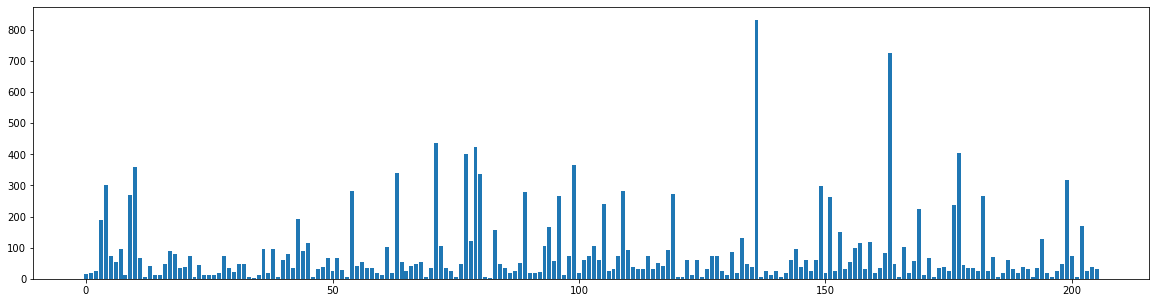

In [17]:
# target変数によって差がある。
plt.figure(figsize=(20,5))
plt.bar(range(target_dists.shape[0]), target_dists["number"])

## per exmaple

16844
1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
Name: number, dtype: int64


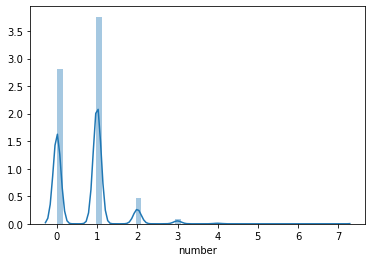

In [18]:
target_dists_per_id = pd.DataFrame(np.sum(train_score[target_feats], axis=1))
target_dists_per_id.columns = ["number"]
print(target_dists_per_id["number"].sum())
print(target_dists_per_id["number"].value_counts())
sns.distplot(target_dists_per_id["number"])

In [19]:
# positive label rate = 0.3%
target_dists_per_id["number"].sum() * 100 / (len(target_feats) * train_feat.shape[0])

0.34335680814337

## correlations in target variables

In [20]:
correlations = train_score[target_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(20)

level_0                            level_1  \
42210                     fgfr_inhibitor                    vegfr_inhibitor   
42211                    vegfr_inhibitor                     fgfr_inhibitor   
42212  norepinephrine_reuptake_inhibitor       serotonin_reuptake_inhibitor   
42213       serotonin_reuptake_inhibitor  norepinephrine_reuptake_inhibitor   
42214                 insulin_sensitizer              ppar_receptor_agonist   
42215              ppar_receptor_agonist                 insulin_sensitizer   
42216                  caspase_activator                apoptosis_stimulant   
42217                apoptosis_stimulant                  caspase_activator   
42218  nitric_oxide_production_inhibitor                     nrf2_activator   
42219                     nrf2_activator  nitric_oxide_production_inhibitor   
42220                       trpv_agonist   aldehyde_dehydrogenase_inhibitor   
42221   aldehyde_dehydrogenase_inhibitor                       trpv_agonist   
42222                    pdgfr_inhibitor                     flt3_inhibitor   
42223                     flt3_inhibitor                    pdgfr_inhibitor   
42224                      kit_inhibitor                     flt3_inhibitor   
42225                     flt3_inhibitor                      kit_inhibitor   
42226                    pdgfr_inhibitor                      kit_inhibitor   
42227                      kit_inhibitor                    pdgfr_inhibitor   
42228                     nfkb_inhibitor               proteasome_inhibitor   
42229               proteasome_inhibitor                     nfkb_inhibitor   

              0  
42210  0.333914  
42211  0.333914  
42212  0.341511  
42213  0.341511  
42214  0.402977  
42215  0.402977  
42216  0.403381  
42217  0.403381  
42218  0.407888  
42219  0.407888  
42220  0.528950  
42221  0.528950  
42222  0.705119  
42223  0.705119  
42224  0.758112  
42225  0.758112  
42226  0.915603  
42227  0.915603  
42228  0.921340  
42229  0.921340

# auxiliary training data

In [21]:
train_nonscore.shape

(23814, 403)

In [22]:
train_nonscore.head()

sig_id  abc_transporter_expression_enhancer  abl_inhibitor  \
0  id_000644bb2                                    0              0   
1  id_000779bfc                                    0              0   
2  id_000a6266a                                    0              0   
3  id_0015fd391                                    0              0   
4  id_001626bd3                                    0              0   

   ace_inhibitor  acetylcholine_release_enhancer  \
0              0                               0   
1              0                               0   
2              0                               0   
3              0                               0   
4              0                               0   

   adenosine_deaminase_inhibitor  adenosine_kinase_inhibitor  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   adenylyl_cyclase_inhibitor  age_inhibitor  alcohol_dehydrogenase_inhibitor  \
0                           0              0                                0   
1                           0              0                                0   
2                           0              0                                0   
3                           0              0                                0   
4                           0              0                                0   

   aldehyde_dehydrogenase_activator  aldose_reductase_inhibitor  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   alpha_mannosidase_inhibitor  ampk_inhibitor  \
0                            0               0   
1                            0               0   
2                            0               0   
3                            0               0   
4                            0               0   

   androgen_biosynthesis_inhibitor  angiotensin_receptor_agonist  antacid  \
0                                0                             0        0   
1                                0                             0        0   
2                                0                             0        0   
3                                0                             0        0   
4                                0                             0        0   

   anthelmintic  antihypertensive  antimetabolite  antipruritic  \
0             0                 0               0             0   
1             0                 0               0             0   
2             0                 0               0             0   
3             0                 0               0             0   
4             0                 0               0             0   

   antirheumatic_drug  antiseptic  antispasmodic  antithyroid_agent  \
0                   0           0              0                  0   
1                   0           0              0                  0   
2                   0           0              0                  0   
3                   0           0              0                  0   
4                   0           0              0                  0   

   antitussive  anxiolytic  ap_inhibitor  apolipoprotein_expression_enhancer  \
0            0           0             0                                   0   
1            0           0             0                                   0   
2            0           0             0                                   0   
3            0           0             0                                   0   


In [23]:
set(train_nonscore.sig_id.unique()) == set(train_score.sig_id.unique()) # idは完全一致

True

In [24]:
set(train_score.columns) & set(train_nonscore.columns) # id以外の変数はscore.csvとnon-score.csvで異なる

{'sig_id'}

In [25]:
train_nonscore.describe()

abc_transporter_expression_enhancer  abl_inhibitor  ace_inhibitor  \
count                         23814.000000   23814.000000   23814.000000   
mean                              0.000252       0.001008       0.003821   
std                               0.015871       0.031731       0.061700   
min                               0.000000       0.000000       0.000000   
25%                               0.000000       0.000000       0.000000   
50%                               0.000000       0.000000       0.000000   
75%                               0.000000       0.000000       0.000000   
max                               1.000000       1.000000       1.000000   

       acetylcholine_release_enhancer  adenosine_deaminase_inhibitor  \
count                    23814.000000                        23814.0   
mean                         0.000252                            0.0   
std                          0.015871                            0.0   
min                          0.000000                            0.0   
25%                          0.000000                            0.0   
50%                          0.000000                            0.0   
75%                          0.000000                            0.0   
max                          1.000000                            0.0   

       adenosine_kinase_inhibitor  adenylyl_cyclase_inhibitor  age_inhibitor  \
count                23814.000000                23814.000000   23814.000000   
mean                     0.000084                    0.000252       0.000504   
std                      0.009164                    0.015871       0.022443   
min                      0.000000                    0.000000       0.000000   
25%                      0.000000                    0.000000       0.000000   
50%                      0.000000                    0.000000       0.000000   
75%                      0.000000                    0.000000       0.000000   
max                      1.000000                    1.000000       1.000000   

       alcohol_dehydrogenase_inhibitor  aldehyde_dehydrogenase_activator  \
count                     23814.000000                      23814.000000   
mean                          0.000504                          0.000252   
std                           0.022443                          0.015871   
min                           0.000000                          0.000000   
25%                           0.000000                          0.000000   
50%                           0.000000                          0.000000   
75%                           0.000000                          0.000000   
max                           1.000000                          1.000000   

       aldose_reductase_inhibitor  alpha_mannosidase_inhibitor  \
count                23814.000000                      23814.0   
mean                     0.000756                          0.0   
std                      0.027483                          0.0   
min                      0.000000                          0.0   
25%                      0.000000                          0.0   
50%                      0.000000                          0.0   
75%                      0.000000                          0.0   
max                      1.000000                          0.0   

       ampk_inhibitor  androgen_biosynthesis_inhibitor  \
count    23814.000000                     23814.000000   
mean         0.000252                         0.000252   
std          0.015871                         0.015871   
min          0.000000                         0.000000   
25%          0.000000                         0.000000   
50%          0.000000                         0.000000   
75%          0.000000                         0.000000   
max          1.000000                         1.000000   

       angiotensin_receptor_agonist       antacid  anthelmintic  \
count                  23814.000000  23814.000000  23814.000000   
mean           

# test data

In [26]:
test_feat.shape

(3982, 876)

In [27]:
set(test_feat.columns) == set(train_feat.columns)

True

In [28]:
# testのctl_vehicleでもoaはゼロということ？
test_feat["cp_type"].value_counts()

trt_cp         3624
ctl_vehicle     358
Name: cp_type, dtype: int64

# combined training data

In [29]:
train = pd.merge(train_feat, train_score, on="sig_id")
print(train.shape)

(23814, 1082)


In [30]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12  \
0 -0.1944 -1.0120 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574   
1  1.0190  0.5207  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958   
2 -0.0323  1.2390  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366   
3  4.0620 -0.8095 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511   
4  1.4180 -0.8244 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577   

     g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21  \
0 -0.4015  0.1789 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360   
1  0.4590  0.0803  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646   
2 -1.8300  0.6057 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181   
3 -0.5844 -2.5690  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580   
4  1.1750  0.2042  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685   

     g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30  \
0 -1.1880  0.6940  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934   
1 -0.2657 -0.3372  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499   
2 -1.5320  0.2307  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530   
3 -0.7191 -0.8004 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575   
4  0.7649  0.2057  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712   

     g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39  \
0 -0.5584 -0.0916 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162   
1 -0.2627  0.9959 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455   
2  0.6069  0.4290  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310   
3  0.0881 -2.7370  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814   
4  0.6389  0.6674 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848   

     g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48  \
0 -0.0347 -0.2566 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350   
1  0.1194 -0.3958 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710   
2  0.3477 -0.5561  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983   
3 -0.7229 -0.0010  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851   
4  0.1302  0.1224  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780   

     g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57  \
0  0.4233 -0.1221 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263   
1 -0.8900  1.2730 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759   
2  0.4552 -0.0978 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621   
3  0.6636 -2.8230 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331   
4 -0.8147 -0.0803 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130   

     g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66  \
0  0.5790  0.9588  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670   
1  0.3249 -0.7408 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026   
2 -0.1757 -1.4370  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292   
3  0.0899 -1.5240  0.3936  1.4630 -1.2100 -1.2340 -1.0300  0.7977  0.2314   
4  0.7709  0.6745  0.7871  1.6410  0.1806  1.3480  1.1070  0.5392  0.0000   

     g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75  \
0 -0.4195  0.6551 -0.7395 -0.7047 -0.5369  0.0314 -0.5239 -0.3406 -0.6332   
1  0.0954 -0.4054  0.1197  0.1956  0.0720 -0.2463 -0.1084  0.4008 -0.5857   
2  0.0939  0.5916  0.6809  0.7821  0.6801  0.9634  0.4057 -0.0708 -1.3570   
3  

In [31]:
# it's confirmed that control perturbations have no MoAs
train[train.cp_type=="ctl_vehicle"][target_feats].sum().sum()

0

In [32]:
train_cp = train[train.cp_type=="trt_cp"].copy().reset_index(drop=True)

In [33]:
correlations = train_cp[target_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(20)

level_0                            level_1  \
42210                    vegfr_inhibitor                     fgfr_inhibitor   
42211                     fgfr_inhibitor                    vegfr_inhibitor   
42212  norepinephrine_reuptake_inhibitor       serotonin_reuptake_inhibitor   
42213       serotonin_reuptake_inhibitor  norepinephrine_reuptake_inhibitor   
42214                 insulin_sensitizer              ppar_receptor_agonist   
42215              ppar_receptor_agonist                 insulin_sensitizer   
42216                  caspase_activator                apoptosis_stimulant   
42217                apoptosis_stimulant                  caspase_activator   
42218  nitric_oxide_production_inhibitor                     nrf2_activator   
42219                     nrf2_activator  nitric_oxide_production_inhibitor   
42220   aldehyde_dehydrogenase_inhibitor                       trpv_agonist   
42221                       trpv_agonist   aldehyde_dehydrogenase_inhibitor   
42222                     flt3_inhibitor                    pdgfr_inhibitor   
42223                    pdgfr_inhibitor                     flt3_inhibitor   
42224                      kit_inhibitor                     flt3_inhibitor   
42225                     flt3_inhibitor                      kit_inhibitor   
42226                      kit_inhibitor                    pdgfr_inhibitor   
42227                    pdgfr_inhibitor                      kit_inhibitor   
42228               proteasome_inhibitor                     nfkb_inhibitor   
42229                     nfkb_inhibitor               proteasome_inhibitor   

              0  
42210  0.333715  
42211  0.333715  
42212  0.341479  
42213  0.341479  
42214  0.402823  
42215  0.402823  
42216  0.403324  
42217  0.403324  
42218  0.407857  
42219  0.407857  
42220  0.528933  
42221  0.528933  
42222  0.704812  
42223  0.704812  
42224  0.757870  
42225  0.757870  
42226  0.915517  
42227  0.915517  
42228  0.921120  
42229  0.921120

In [34]:
correlations = train_cp[g_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(20)

level_0 level_1         0
595192    g-37   g-672  0.833165
595193   g-672    g-37  0.833165
595194   g-121   g-672  0.837354
595195   g-672   g-121  0.837354
595196   g-195    g-63  0.838530
595197    g-63   g-195  0.838530
595198   g-744   g-123  0.839280
595199   g-123   g-744  0.839280
595200   g-369   g-569  0.841484
595201   g-569   g-369  0.841484
595202   g-460   g-349  0.845178
595203   g-349   g-460  0.845178
595204    g-50   g-489  0.847806
595205   g-489    g-50  0.847806
595206   g-489    g-37  0.850502
595207    g-37   g-489  0.850502
595208    g-50   g-672  0.851694
595209   g-672    g-50  0.851694
595210    g-50    g-37  0.912383
595211    g-37    g-50  0.912383

In [35]:
correlations = train_cp[c_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(20)

level_0 level_1         0
9880    c-94    c-13  0.915666
9881    c-13    c-94  0.915666
9882    c-42     c-4  0.917120
9883     c-4    c-42  0.917120
9884    c-38    c-94  0.917296
9885    c-94    c-38  0.917296
9886    c-38    c-63  0.917566
9887    c-63    c-38  0.917566
9888    c-52     c-4  0.917748
9889     c-4    c-52  0.917748
9890    c-33     c-6  0.917805
9891     c-6    c-33  0.917805
9892    c-55    c-11  0.917963
9893    c-11    c-55  0.917963
9894    c-26    c-13  0.924001
9895    c-13    c-26  0.924001
9896    c-73    c-13  0.924338
9897    c-13    c-73  0.924338
9898    c-42    c-52  0.927873
9899    c-52    c-42  0.927873

In [36]:
# target variables vs explanation variables
all_feats = [i for i in train_cp.columns if i != "sig_id"]
correlations = train_cp[all_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'].isin(target_feats)]
correlations = correlations[~correlations['level_1'].isin(target_feats)].reset_index(drop=True)
correlations.tail(20)

level_0 level_1         0
179818        nfkb_inhibitor    c-78  0.763313
179819  proteasome_inhibitor    c-14  0.767815
179820  proteasome_inhibitor    c-68  0.770052
179821  proteasome_inhibitor    c-27  0.772269
179822  proteasome_inhibitor    c-61  0.772351
179823  proteasome_inhibitor    c-72  0.772406
179824  proteasome_inhibitor    c-90  0.774141
179825  proteasome_inhibitor    c-17  0.778975
179826  proteasome_inhibitor    c-93  0.780356
179827  proteasome_inhibitor    c-35  0.782141
179828  proteasome_inhibitor    c-44  0.782305
179829  proteasome_inhibitor    c-88  0.783706
179830  proteasome_inhibitor    c-85  0.784811
179831  proteasome_inhibitor    c-83  0.787470
179832  proteasome_inhibitor    c-16  0.789159
179833  proteasome_inhibitor   g-349  0.789331
179834  proteasome_inhibitor    c-31  0.798461
179835  proteasome_inhibitor    c-53  0.798831
179836  proteasome_inhibitor    c-32  0.804192
179837  proteasome_inhibitor    c-78  0.819816

In [37]:
correlations.head(20)

level_0 level_1             0
0                  beta_amyloid_inhibitor   g-217  3.928972e-08
1                          acat_inhibitor   g-255  1.142334e-07
2         benzodiazepine_receptor_agonist   g-481  3.948857e-07
3                  beta_amyloid_inhibitor   g-345  4.094129e-07
4                           hcv_inhibitor   g-373  4.442083e-07
5                 cck_receptor_antagonist   g-253  4.911229e-07
6                           antihistamine    g-23  5.000695e-07
7                    insulin_secretagogue   g-251  5.217303e-07
8             potassium_channel_activator   g-649  5.558960e-07
9                               analgesic    c-58  5.720282e-07
10       progesterone_receptor_antagonist   g-765  5.808323e-07
11                    apoptosis_stimulant   g-536  7.234841e-07
12                              analgesic   g-383  7.659585e-07
13                          antihistamine   g-584  8.081027e-07
14                               diuretic    g-13  8.622598e-07
15  ubiquitin_specific_protease_inhibitor   g-455  9.422703e-07
16                         acat_inhibitor    g-87  1.010965e-06
17           serotonin_reuptake_inhibitor    g-85  1.249700e-06
18           cannabinoid_receptor_agonist   g-530  1.279710e-06
19                casein_kinase_inhibitor   g-554  1.326017e-06

# comparison of training and test data

# Summary

- clear correlation in g-variables
- almost all g variables have normal distribution with one peak, but some have second peak and sharp peak
- clear correlation in c-variables 
- clear correlation in target-variables
- even after removing control pertubations data, correlations of g-variables, c-variables and target-variables remain
- only 0.3% of labels become 1 in the training data, so the data are skewed
- almost all exmaples have 0 or 1 positive labels
- some explanatory variables significantly effect target variables
- train_features.csv and train_targets_scored.csv can be connected via sig_id without data loss

### question ###
- control pertubations have no Moas, then why are the data included in the training data?
- how can I utilized nonscore training data?